In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Data Exploration

In [3]:
# 1 Explore the data, list down the unique values in each feature and find its length. Perform the statistical analysis and renaming of the columns. 

In [11]:
df=pd.read_csv('Employee.csv')
df

,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0
...,...,...,...,...,...,...
143,TCS,33.0,9024.0,Calcutta,India,1
144,Infosys,22.0,8787.0,Calcutta,India,1
145,Infosys,44.0,4034.0,Delhi,India,1
146,TCS,33.0,5034.0,Mumbai,India,1


In [37]:
stats=df.describe(include='all')
print('\nStatistical Analysis:\n', stats)


Statistical Analysis:
        Company         Age       Salary   Place Country      Gender
count      140  130.000000   124.000000     134     148  148.000000
unique       6         NaN          NaN      11       1         NaN
top        TCS         NaN          NaN  Mumbai   India         NaN
freq        53         NaN          NaN      37     148         NaN
mean       NaN   30.484615  5312.467742     NaN     NaN    0.222973
std        NaN   11.096640  2573.764683     NaN     NaN    0.417654
min        NaN    0.000000  1089.000000     NaN     NaN    0.000000
25%        NaN   22.000000  3030.000000     NaN     NaN    0.000000
50%        NaN   32.500000  5000.000000     NaN     NaN    0.000000
75%        NaN   37.750000  8000.000000     NaN     NaN    0.000000
max        NaN   54.000000  9876.000000     NaN     NaN    1.000000


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Company  140 non-null    object 
 1   Age      130 non-null    float64
 2   Salary   124 non-null    float64
 3   Place    134 non-null    object 
 4   Country  148 non-null    object 
 5   Gender   148 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 7.1+ KB


In [75]:
df.isnull().sum()

Organisation        8
Employee_Age       24
Employee_Salary    24
Location           14
Nation              0
Employee_Gender     0
dtype: int64

In [21]:
for i in df.columns:
    unique_value=df[i].unique()
    print(f'{i}: Unique values = {unique_value}')
    print(f'{i}: Count of unique values = {len(unique_value)}')

Company: Unique values = ['TCS' 'Infosys' 'CTS' nan 'Tata Consultancy Services' 'Congnizant'
 'Infosys Pvt Lmt']
Company: Count of unique values = 7
Age: Unique values = [20. 30. 35. 40. 23. nan 34. 45. 18. 22. 32. 37. 50. 21. 46. 36. 26. 41.
 24. 25. 43. 19. 38. 51. 31. 44. 33. 17.  0. 54.]
Age: Count of unique values = 30
Salary: Unique values = [  nan 2300. 3000. 4000. 5000. 6000. 7000. 8000. 9000. 1089. 1234. 3030.
 3045. 3184. 4824. 5835. 7084. 8943. 8345. 9284. 9876. 2034. 7654. 2934.
 4034. 5034. 8202. 9024. 4345. 6544. 6543. 3234. 4324. 5435. 5555. 8787.
 3454. 5654. 5009. 5098. 3033.]
Salary: Count of unique values = 41
Place: Unique values = ['Chennai' 'Mumbai' 'Calcutta' 'Delhi' 'Podicherry' 'Cochin' nan 'Noida'
 'Hyderabad' 'Bhopal' 'Nagpur' 'Pune']
Place: Count of unique values = 12
Country: Unique values = ['India']
Country: Count of unique values = 1
Gender: Unique values = [0 1]
Gender: Count of unique values = 2


In [23]:
df.rename(columns={'Company':'Organisation',
                   'Age':'Employee_Age',
                   'Salary':'Employee_Salary',
                   'Place':'Location',
                   'Country':'Nation',
                   'Gender':'Employee_Gender'}, inplace=True)
print('\nUpdated Columns:\n',df.columns)
df



Updated Columns:
 Index(['Organisation', 'Employee_Age', 'Employee_Salary', 'Location', 'Nation',
       'Employee_Gender'],
      dtype='object')


,Organisation,Employee_Age,Employee_Salary,Location,Nation,Employee_Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0
...,...,...,...,...,...,...
143,TCS,33.0,9024.0,Calcutta,India,1
144,Infosys,22.0,8787.0,Calcutta,India,1
145,Infosys,44.0,4034.0,Delhi,India,1
146,TCS,33.0,5034.0,Mumbai,India,1


# Data Cleaning

In [53]:
# 2 Find the missing and inappropriate values, treat them appropriately. Remove all duplicate rows. Find the outliers. Replace the value 0 in age as NaN Treat the null values in all columns using any measures(removing/ replace the values with mean/median/mode) 

In [35]:
# Replace the value 0 in age as NaN

df['Employee_Age'].replace(0,np.NaN)
df['Employee_Age'].unique()

array([20., 30., 35., 40., 23., nan, 34., 45., 18., 22., 32., 37., 50.,
       21., 46., 36., 26., 41., 24., 25., 43., 19., 38., 51., 31., 44.,
       33., 17.,  0., 54.])

In [53]:
# Treat the null values in all columns using any measures(removing/ replace the values with mean/median/mode)
for i in df.columns:
    missing_count = df[i].isnull().sum()
    print(f'Missing values in {i}: {missing_count}')

#Treat missing values (replace numeric columns with mean, categorical columns with mode)
numeric_columns=df.select_dtypes(include=[np.number]).columns
categorical_columns =df.select_dtypes(exclude=[np.number]).columns
for col in numeric_columns:
    df[col].fillna(df[col].mean())

for col in categorical_columns:
    df[col].fillna(df[col].mode()[0])
df

# Remove duplicate rows
df.drop_duplicates(inplace=True)
df

Missing values in Organisation: 0
Missing values in Employee_Age: 0
Missing values in Employee_Salary: 0
Missing values in Location: 0
Missing values in Nation: 0
Missing values in Employee_Gender: 0


,Organisation,Employee_Age,Employee_Salary,Location,Nation,Employee_Gender
0,TCS,20.0,5312.467742,Chennai,India,0
1,Infosys,30.0,5312.467742,Mumbai,India,0
2,TCS,35.0,2300.000000,Calcutta,India,0
3,Infosys,40.0,3000.000000,Delhi,India,0
4,TCS,23.0,4000.000000,Mumbai,India,0
...,...,...,...,...,...,...
142,Infosys Pvt Lmt,22.0,8202.000000,Mumbai,India,0
143,TCS,33.0,9024.000000,Calcutta,India,1
145,Infosys,44.0,4034.000000,Delhi,India,1
146,TCS,33.0,5034.000000,Mumbai,India,1


In [55]:
# Detect outliers and handling outlers (by IQR method)
Q1 = df[numeric_columns].quantile(0.25)
Q3 = df[numeric_columns].quantile(0.75)
IQR = Q3 - Q1

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

outliers = df[(df[numeric_columns] < lower_limit) | (df[numeric_columns] > upper_limit)]
print('Outliers Detected:\n', outliers)

# Treating Outlires by Capping
for i in numeric_columns:
    df[i] = df[i].clip(lower=lower_limit[i], upper=upper_limit[i])

print('\nCleaned Dataset with Clipped Outliers:\n', df)

Outliers Detected:
     Organisation  Employee_Age  Employee_Salary Location Nation  \
0            NaN           NaN              NaN      NaN    NaN   
1            NaN           NaN              NaN      NaN    NaN   
2            NaN           NaN              NaN      NaN    NaN   
3            NaN           NaN              NaN      NaN    NaN   
4            NaN           NaN              NaN      NaN    NaN   
..           ...           ...              ...      ...    ...   
142          NaN           NaN              NaN      NaN    NaN   
143          NaN           NaN              NaN      NaN    NaN   
145          NaN           NaN              NaN      NaN    NaN   
146          NaN           NaN              NaN      NaN    NaN   
147          NaN           NaN              NaN      NaN    NaN   

     Employee_Gender  
0                NaN  
1                NaN  
2                NaN  
3                NaN  
4                NaN  
..               ...  
142           

# Data Analysis

In [31]:
# 3 Filter the data with age >40 and salary<5000 Plot the chart with age and salary Count the number of people from each place and represent it visually

filtered_data = df[(df['Employee_Age'] > 40) & (df['Employee_Salary'] < 5000)]
print('\nFiltered Data:\n', filtered_data)


Filtered Data:
     Organisation  Employee_Age  Employee_Salary   Location Nation  \
21       Infosys          50.0           3184.0      Delhi  India   
32       Infosys          45.0           4034.0   Calcutta  India   
39       Infosys          41.0           3000.0     Mumbai  India   
50       Infosys          41.0           3000.0    Chennai  India   
57       Infosys          51.0           3184.0  Hyderabad  India   
68       Infosys          43.0           4034.0     Mumbai  India   
75       Infosys          44.0           3000.0     Cochin  India   
86       Infosys          41.0           3000.0      Delhi  India   
93       Infosys          54.0           3184.0     Mumbai  India   
104      Infosys          44.0           4034.0      Delhi  India   
122      Infosys          44.0           3234.0     Mumbai  India   
129      Infosys          50.0           3184.0   Calcutta  India   
138          CTS          44.0           3033.0     Cochin  India   
140      Infosys 

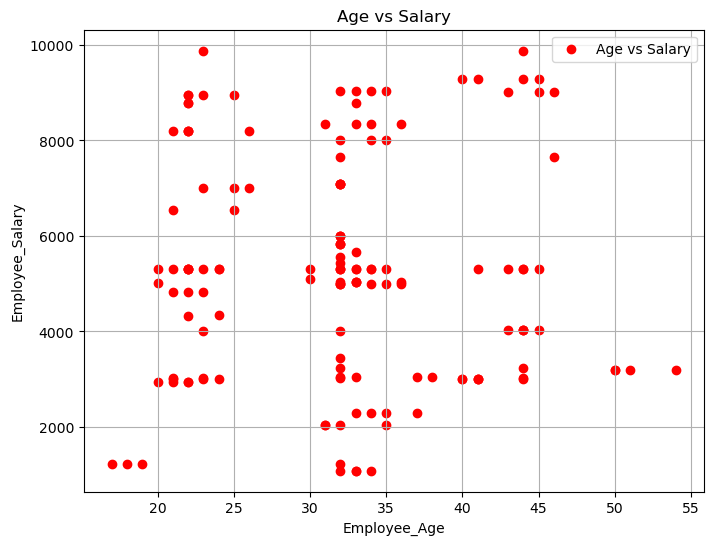

In [171]:
# Plot a chart with Age and Salary (Scatter  Plot)
plt.figure(figsize=(8,6))
plt.scatter(df['Employee_Age'], df['Employee_Salary'], color='r', label='Age vs Salary')
plt.xlabel('Employee_Age')
plt.ylabel('Employee_Salary')
plt.title('Age vs Salary')
plt.legend()
plt.grid()
plt.show()


Count of People from Each Place:
 Location
Mumbai        48
Calcutta      32
Chennai       14
Delhi         14
Cochin        13
Noida          8
Hyderabad      8
Podicherry     3
Pune           2
Bhopal         1
Nagpur         1
Name: count, dtype: int64


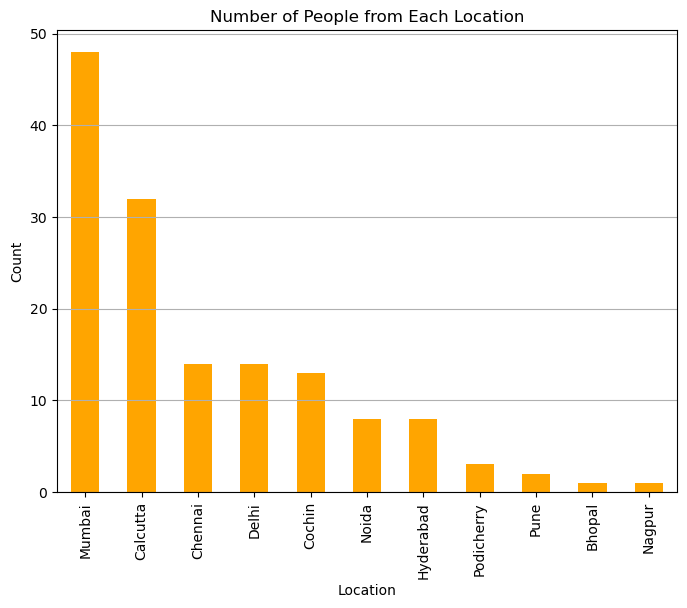

In [177]:
# Count the number of people from each place
place_counts = df['Location'].value_counts()
print('\nCount of People from Each Place:\n', place_counts)

# Represent the counts visually using a bar chart
place_counts.plot(kind='bar', color='orange', figsize=(8, 6))
plt.xlabel('Location')
plt.ylabel('Count')
plt.title('Number of People from Each Location')
plt.grid(axis='y')
plt.show()

# Data Encoding

In [1]:
# Data Encoding:Convert categorical variables into numerical representations using techniques such as one-hot encoding, label encoding, making them suitable for analysis by machine learning algorithms.

In [67]:
from sklearn.preprocessing import LabelEncoder

In [101]:
# Label Encoding for 'Organisation' column
label_encoder = LabelEncoder()
df['Organisation'] = label_encoder.fit_transform(df['Organisation'])

# One-Hot Encoding for 'Location' column
o_h_encode=pd.get_dummies(df['Location'],prefix='Location',dummy_na=True)
df=pd.concat([df,o_h_encode],axis=1)
print("Encoded Dataset:")
df

Encoded Dataset:


,Organisation,Employee_Age,Employee_Salary,Location,Nation,Employee_Gender,Location_Bhopal,Location_Calcutta,Location_Chennai,Location_Cochin,...,Location_2.0,Location_3.0,Location_4.0,Location_5.0,Location_6.0,Location_7.0,Location_8.0,Location_9.0,Location_10.0,Location_nan
0,4,20.0,5312.467742,2,India,0,False,False,True,False,...,True,False,False,False,False,False,False,False,False,False
1,2,30.0,5312.467742,6,India,0,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
2,4,35.0,2300.000000,1,India,0,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3,2,40.0,3000.000000,4,India,0,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
4,4,23.0,4000.000000,6,India,0,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,3,22.0,8202.000000,6,India,0,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
143,4,33.0,9024.000000,1,India,0,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
145,2,44.0,4034.000000,4,India,0,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
146,4,33.0,5034.000000,6,India,0,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False


# Feature Scaling

In [73]:
# Feature Scaling: After the process of encoding, perform the scaling of the features using standardscaler and minmaxscaler.

In [89]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

features_to_scale=['Organisation','Employee_Age','Employee_Salary','Location']

# Standard Scaling
standard_scaler = StandardScaler()
df_standard_scaled = df.copy()
df_standard_scaled[features_to_scale] = standard_scaler.fit_transform(df[features_to_scale])
print("Dataset after Standard Scaling:")
df_standard_scaled

Dataset after Standard Scaling:


,Organisation,Employee_Age,Employee_Salary,Location,Nation,Employee_Gender,Location_Bhopal,Location_Calcutta,Location_Chennai,Location_Cochin,...,Location_2.0,Location_3.0,Location_4.0,Location_5.0,Location_6.0,Location_7.0,Location_8.0,Location_9.0,Location_10.0,Location_nan
0,0.991489,-1.068534,0.010324,-0.893255,India,0,False,False,True,False,...,True,False,False,False,False,False,False,False,False,False
1,-0.239325,-0.066939,0.010324,0.750562,India,0,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
2,0.991489,0.433859,-1.266072,-1.304209,India,0,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3,-0.239325,0.934656,-0.969479,-0.071346,India,0,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
4,0.991489,-0.768055,-0.545775,0.750562,India,0,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,0.376082,-0.868215,1.234631,0.750562,India,0,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
143,0.991489,0.233540,1.582916,-1.304209,India,0,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
145,-0.239325,1.335294,-0.531369,-0.071346,India,0,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
146,0.991489,0.233540,-0.107664,0.750562,India,0,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False


In [93]:
# MinMax Scaling
minmax_scaler = MinMaxScaler()
df_minmax_scaled = df.copy()
df_minmax_scaled[features_to_scale] = minmax_scaler.fit_transform(df[features_to_scale])

print("\nDataset after Min-Max Scaling:")
df_minmax_scaled


Dataset after Min-Max Scaling:


,Organisation,Employee_Age,Employee_Salary,Location,Nation,Employee_Gender,Location_Bhopal,Location_Calcutta,Location_Chennai,Location_Cochin,...,Location_2.0,Location_3.0,Location_4.0,Location_5.0,Location_6.0,Location_7.0,Location_8.0,Location_9.0,Location_10.0,Location_nan
0,0.8,0.326733,0.480650,0.2,India,0,False,False,True,False,...,True,False,False,False,False,False,False,False,False,False
1,0.4,0.524752,0.480650,0.6,India,0,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
2,0.8,0.623762,0.137817,0.1,India,0,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3,0.4,0.722772,0.217480,0.4,India,0,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
4,0.8,0.386139,0.331285,0.6,India,0,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,0.6,0.366337,0.809491,0.6,India,0,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
143,0.8,0.584158,0.903039,0.1,India,0,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
145,0.4,0.801980,0.335154,0.4,India,0,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
146,0.8,0.584158,0.448959,0.6,India,0,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
